# Import libraries

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [2]:
from feature_engine.encoding import RareLabelEncoder
from feature_engine.selection import SelectByTargetMeanPerformance

# Import data

In [3]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [4]:

X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 15511 to 2732
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mean_atomic_mass                 16954 non-null  float64
 1   wtd_mean_atomic_mass             16954 non-null  float64
 2   gmean_atomic_mass                16954 non-null  float64
 3   wtd_gmean_atomic_mass            16954 non-null  float64
 4   entropy_atomic_mass              16954 non-null  float64
 5   wtd_entropy_atomic_mass          16954 non-null  float64
 6   range_atomic_mass                16954 non-null  float64
 7   wtd_range_atomic_mass            16954 non-null  float64
 8   std_atomic_mass                  16954 non-null  float64
 9   wtd_std_atomic_mass              16954 non-null  float64
 10  mean_fie                         16954 non-null  float64
 11  wtd_mean_fie                     16954 non-null  float64
 12  gmean_fie           

# Tarfet encoding

In [8]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def evaluate_feature_selection_target_encoding(X_train, y_train, X_test, y_test, list_of_models, bin_range=(10, 71, 10), cv=3):
    results = []
    for num_bins in range(*bin_range):
        print(f"Calculating for {num_bins} bins...")
        encoder = TargetEncoder(cols=X_train.columns, smoothing=num_bins, min_samples_leaf=1)
        encoder.fit(X_train, y_train)
        X_train_selected = encoder.transform(X_train)
        X_test_selected = encoder.transform(X_test)

        # Scaling data
        min_max_scaler = MinMaxScaler()
        X_train_sc = min_max_scaler.fit_transform(X_train_selected)
        X_test_sc = min_max_scaler.transform(X_test_selected)

        scaler = MinMaxScaler()
        y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
        y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

        model_results_list = []

        for model in list_of_models:
            cv_result = cross_validate(
                estimator=model,
                X=X_train_sc,
                y=y_train_sc.ravel(),
                scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                cv=cv,
                n_jobs=-1
            )

            r2 = np.mean(cv_result['test_r2'])
            mse = -np.mean(cv_result['test_neg_mean_squared_error'])
            mae = -np.mean(cv_result['test_neg_mean_absolute_error'])

            model_results_list.append({
                'Model': type(model).__name__,
                'Num_Bins': num_bins,
                'R2': r2,
                'MSE': mse,
                'MAE': mae
            })

            print(f"Model: {type(model).__name__}, Bins: {num_bins}, R2: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

        results.extend(model_results_list)

    return pd.DataFrame(results)

# Define your list of models
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

# Call the function to evaluate different feature selection and models using target encoding
evaluation_results_target_encoding = evaluate_feature_selection_target_encoding(X_train, y_train, X_test, y_test, list_of_models, bin_range=(10, 71, 10), cv=3)
print(evaluation_results_target_encoding)

Calculating for 10 bins...
Model: RandomForestRegressor, Bins: 10, R2: 0.9748, MSE: 0.0009, MAE: 0.0111
Model: XGBRegressor, Bins: 10, R2: 0.9733, MSE: 0.0009, MAE: 0.0117
Model: KNeighborsRegressor, Bins: 10, R2: 0.9705, MSE: 0.0010, MAE: 0.0175
Model: LGBMRegressor, Bins: 10, R2: 0.9794, MSE: 0.0007, MAE: 0.0110
Model: SVR, Bins: 10, R2: 0.9121, MSE: 0.0030, MAE: 0.0455
Model: DecisionTreeRegressor, Bins: 10, R2: 0.9673, MSE: 0.0011, MAE: 0.0121
Model: GradientBoostingRegressor, Bins: 10, R2: 0.9779, MSE: 0.0008, MAE: 0.0127
Calculating for 20 bins...
Model: RandomForestRegressor, Bins: 20, R2: 0.9750, MSE: 0.0009, MAE: 0.0105
Model: XGBRegressor, Bins: 20, R2: 0.9734, MSE: 0.0009, MAE: 0.0110
Model: KNeighborsRegressor, Bins: 20, R2: 0.9726, MSE: 0.0009, MAE: 0.0162
Model: LGBMRegressor, Bins: 20, R2: 0.9797, MSE: 0.0007, MAE: 0.0100
Model: SVR, Bins: 20, R2: 0.9210, MSE: 0.0027, MAE: 0.0425
Model: DecisionTreeRegressor, Bins: 20, R2: 0.9680, MSE: 0.0011, MAE: 0.0115
Model: Gradient

In [18]:
pivot_table = evaluation_results_target_encoding.pivot_table(index=['Num_Bins', 'Model'], values=['MSE', 'MAE'], aggfunc='mean')

# Print the pivot table
pivot_table

MAE       MSE
Num_Bins Model                                        
10       DecisionTreeRegressor      0.012112  0.001120
         GradientBoostingRegressor  0.012748  0.000759
         KNeighborsRegressor        0.017509  0.001011
         LGBMRegressor              0.010958  0.000708
         RandomForestRegressor      0.011101  0.000865
         SVR                        0.045504  0.003013
         XGBRegressor               0.011684  0.000915
20       DecisionTreeRegressor      0.011484  0.001096
         GradientBoostingRegressor  0.010960  0.000696
         KNeighborsRegressor        0.016209  0.000940
         LGBMRegressor              0.010031  0.000696
         RandomForestRegressor      0.010517  0.000858
         SVR                        0.042463  0.002709
         XGBRegressor               0.011020  0.000911
30       DecisionTreeRegressor      0.011277  0.001075
         GradientBoostingRegressor  0.010199  0.000667
         KNeighborsRegressor        0.015677  0.000917
         LGBMRegressor              0.009709  0.000694
         RandomForestRegressor      0.010243  0.000850
         SVR                        0.041549  0.002622
         XGBRegressor               0.010828  0.000919
40       DecisionTreeRegressor      0.011205  0.001091
         GradientBoostingRegressor  0.009774  0.000655
         KNeighborsRegressor        0.015381  0.000902
         LGBMRegressor              0.009498  0.000694
         RandomForestRegressor      0.010117  0.000853
         SVR                        0.041304  0.002597
         XGBRegressor               0.010686  0.000923
50       DecisionTreeRegressor      0.010956  0.001066
         GradientBoostingRegressor  0.009430  0.000641
         KNeighborsRegressor        0.015245  0.000894
         LGBMRegressor              0.009375  0.000698
         RandomForestRegressor      0.010018  0.000854
         SVR                        0.041436  0.002604
         XGBRegressor               0.010547  0.000927
60       DecisionTreeRegressor      0.010948  0.001070
         GradientBoostingRegressor  0.009225  0.000637
         KNeighborsRegressor        0.015186  0.000891
         LGBMRegressor              0.009300  0.000700
         RandomForestRegressor      0.009963  0.000851
         SVR                        0.041692  0.002623
         XGBRegressor               0.010486  0.000929
70       DecisionTreeRegressor      0.010948  0.001074
         GradientBoostingRegressor  0.009017  0.000629
         KNeighborsRegressor        0.015079  0.000885
         LGBMRegressor              0.009217  0.000692
         RandomForestRegressor      0.009893  0.000841
         SVR                        0.042095  0.002658
         XGBRegressor               0.010410  0.000921

In [19]:
def evaluate_feature_selection_target_encoding(X_train, y_train, X_test, y_test, list_of_models, bin_range=(10, 71, 10), cv=3):
    results = []
    for num_bins in range(*bin_range):
        print(f"Calculating for {num_bins} bins...")
        encoder = TargetEncoder(cols=X_train.columns, smoothing=num_bins, min_samples_leaf=1)
        encoder.fit(X_train, y_train)
        X_train_selected = encoder.transform(X_train)
        X_test_selected = encoder.transform(X_test)

        # Scaling data
        min_max_scaler = MinMaxScaler()
        X_train_sc = min_max_scaler.fit_transform(X_train_selected)
        X_test_sc = min_max_scaler.transform(X_test_selected)

        scaler = MinMaxScaler()
        y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
        y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

        model_results_list = []

        for model in list_of_models:
            cv_result = cross_validate(
                estimator=model,
                X=X_train_sc,
                y=y_train_sc.ravel(),
                scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                cv=cv,
                n_jobs=-1
            )

            r2 = np.mean(cv_result['test_r2'])
            mse = -np.mean(cv_result['test_neg_mean_squared_error'])
            mae = -np.mean(cv_result['test_neg_mean_absolute_error'])

            model_results_list.append({
                'Model': type(model).__name__,
                'Num_Bins': num_bins,
                'R2': r2,
                'MSE': mse,
                'MAE': mae
            })

            print(f"Model: {type(model).__name__}, Bins: {num_bins}, R2: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

        results.extend(model_results_list)

    return pd.DataFrame(results)

# Define your list of models
list_of_models = [
    CatBoostRegressor()
]

# Call the function to evaluate different feature selection and models using target encoding
evaluation_results_target_encoding = evaluate_feature_selection_target_encoding(X_train, y_train, X_test, y_test, list_of_models, bin_range=(10, 71, 10), cv=3)
print(evaluation_results_target_encoding)

Calculating for 10 bins...
Model: CatBoostRegressor, Bins: 10, R2: 0.9766, MSE: 0.0008, MAE: 0.0114
Calculating for 20 bins...
Model: CatBoostRegressor, Bins: 20, R2: 0.9771, MSE: 0.0008, MAE: 0.0105
Calculating for 30 bins...
Model: CatBoostRegressor, Bins: 30, R2: 0.9770, MSE: 0.0008, MAE: 0.0103
Calculating for 40 bins...
Model: CatBoostRegressor, Bins: 40, R2: 0.9772, MSE: 0.0008, MAE: 0.0100
Calculating for 50 bins...
Model: CatBoostRegressor, Bins: 50, R2: 0.9772, MSE: 0.0008, MAE: 0.0099
Calculating for 60 bins...
Model: CatBoostRegressor, Bins: 60, R2: 0.9772, MSE: 0.0008, MAE: 0.0098
Calculating for 70 bins...
Model: CatBoostRegressor, Bins: 70, R2: 0.9771, MSE: 0.0008, MAE: 0.0098
               Model  Num_Bins        R2       MSE       MAE
0  CatBoostRegressor        10  0.976620  0.000802  0.011398
1  CatBoostRegressor        20  0.977074  0.000786  0.010527
2  CatBoostRegressor        30  0.977006  0.000789  0.010280
3  CatBoostRegressor        40  0.977164  0.000783  0.01

In [20]:
pivot_table_2 = evaluation_results_target_encoding.pivot_table(index=['Num_Bins', 'Model'], values=['MSE', 'MAE'], aggfunc='mean')

# Print the pivot table
pivot_table_2

,,MAE,MSE
Num_Bins,Model,,
10,CatBoostRegressor,0.011398,0.000802
20,CatBoostRegressor,0.010527,0.000786
30,CatBoostRegressor,0.010280,0.000789
40,CatBoostRegressor,0.010046,0.000783
50,CatBoostRegressor,0.009933,0.000783
60,CatBoostRegressor,0.009849,0.000784
70,CatBoostRegressor,0.009829,0.000786


In [6]:
sel = SelectByTargetMeanPerformance(
    bins=70,
    strategy='equal_frequency',
    scoring='r2',  
    cv=3,
    threshold=None,
    regression=True, 
)

sel.fit(X_train, y_train)



SelectByTargetMeanPerformance(bins=70, regression=True, scoring='r2',
                              strategy='equal_frequency')

In [7]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'wtd_entropy_fie',
 'wtd_range_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'gmean_atomic_radius',
 'wtd_range_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'wtd_entropy_Density',
 'wtd_range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'mean_FusionHeat',
 'std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'entropy_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'range_Valence',
 'std_Valence',
 'wtd_std_Valence']

In [8]:
sel.feature_performance_

{'mean_atomic_mass': 0.27090875997396635,
 'wtd_mean_atomic_mass': 0.24566668195388483,
 'gmean_atomic_mass': 0.3554334260449458,
 'wtd_gmean_atomic_mass': 0.3576487593232313,
 'entropy_atomic_mass': 0.5110604332267484,
 'wtd_entropy_atomic_mass': 0.5215206567963641,
 'range_atomic_mass': 0.45047362493649196,
 'wtd_range_atomic_mass': 0.2910709740699839,
 'std_atomic_mass': 0.3030370774450363,
 'wtd_std_atomic_mass': 0.34576051864873536,
 'mean_fie': 0.26459624015863686,
 'wtd_mean_fie': 0.4295998486646453,
 'gmean_fie': 0.22473241871994795,
 'wtd_gmean_fie': 0.3804651047396647,
 'entropy_fie': 0.5599637117947692,
 'wtd_entropy_fie': 0.3403416473700087,
 'range_fie': 0.5977890856854712,
 'wtd_range_fie': 0.3695804858990614,
 'std_fie': 0.5296744630352997,
 'wtd_std_fie': 0.5248044043231286,
 'mean_atomic_radius': 0.23224993945036754,
 'wtd_mean_atomic_radius': 0.3488618639543706,
 'gmean_atomic_radius': 0.32283968887615977,
 'wtd_gmean_atomic_radius': 0.44777669409888254,
 'entropy_ato

Text(0.5, 1.0, 'Feature performance based on target encoding')

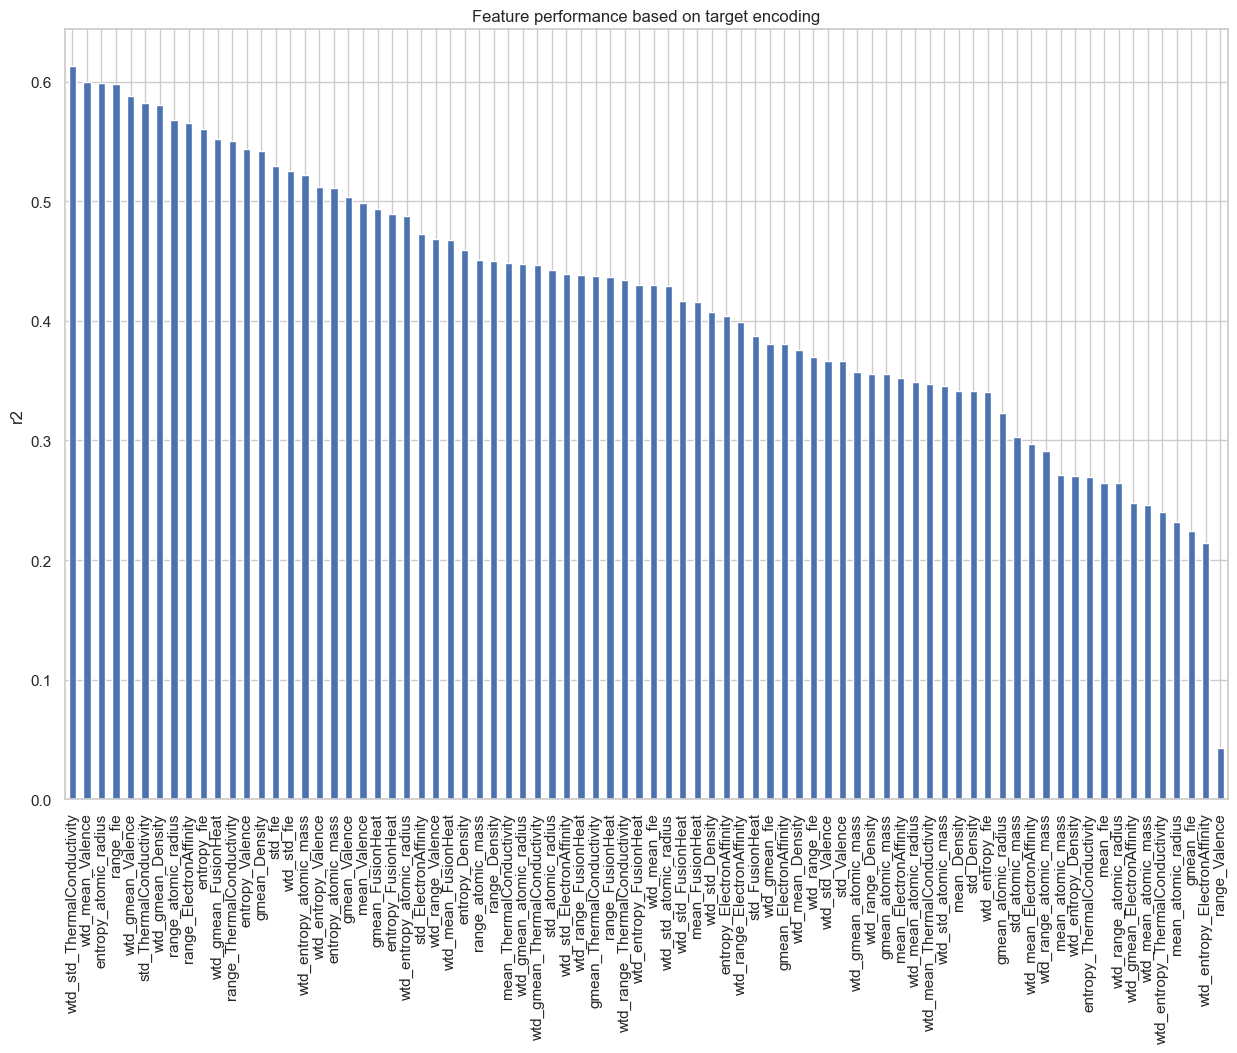

In [9]:
pd.Series(sel.feature_performance_).sort_values(
    ascending=False).plot.bar(figsize=(15, 10))

plt.ylabel('r2')
plt.title('Feature performance based on target encoding')

In [10]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 43), (4239, 43))

# Scaling

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [12]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [28]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [29]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [30]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [31]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0804
Test MAE (LR_baseline) : 0.0814 

Train R^2 (LR_baseline): 0.6844
Test R^2 (LR_baseline) : 0.6829 



# Cross-Validation

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']),
        np.mean(cv_result['test_neg_mean_absolute_error'])  # Removed the negative sign here
    ]

print(cv_results)

                             fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      130.363435    0.058299               -0.002640   
XGBRegressor                19.798999    0.006689               -0.002934   
KNeighborsRegressor          0.011203    0.177790               -0.003515   
LGBMRegressor                1.594031    0.008940               -0.003212   
SVR                         10.768623    0.609887               -0.007345   
DecisionTreeRegressor        1.572733    0.002492               -0.004279   
GradientBoostingRegressor   45.643169    0.003635               -0.005025   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028669  
XGBRegressor                             -0.032355  
KNeighborsRegressor                      -0.033044  
LGBMRegressor                            -0.035862  
SVR                                      -0.064775  
DecisionTreeRegressor                    -0.033938  
GradientBoos

In [33]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  58.303141     0.06647               -0.002971


# RandomForestRegressor

In [33]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_7760\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.005517081157281687
Mean Absolute Error (MAE): 0.049863684050753206
R-squared (R2): 0.8399159091481168
mape: 7.590543012337933


In [45]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize


param_space = {
    'n_estimators': Integer(100, 1000),
   
    'max_depth': Integer(5, 50),
    'min_samples_split': Real(0.01, 0.5),
    'min_samples_leaf': Real(0.01, 0.5),
   
    'max_leaf_nodes': Integer(10, 100),
   
    'max_samples': Real(0.1, 1.0)
}

# Create Random Forest Regressor object
rf = RandomForestRegressor()

# Define Bayesian Search Cross Validation object with 20 iterations
bayes_cv = BayesSearchCV(
    rf,
    param_space,
    n_iter=50,
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Fit the model with bayesian optimization search
bayes_cv.fit(X_train_sc, y_train_sc)

# Get the best hyperparameters
best_params = bayes_cv.best_params_

# Create a new Random Forest Regressor object with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, X_train_sc, y_train_sc, cv=5)

# Print the best hyperparameters and the cross-validation scores
print("Best hyperparameters: ", best_params)
print("Cross-validation scores: ", cv_scores)

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_val

Best hyperparameters:  OrderedDict([('max_depth', 50), ('max_leaf_nodes', 100), ('max_samples', 0.995193150040218), ('min_samples_leaf', 0.01), ('min_samples_split', 0.01), ('n_estimators', 842)])
Cross-validation scores:  [0.80895019 0.82507432 0.82545451 0.81926309 0.82203482]


In [46]:
best_params = {
   
    'max_depth': 50,
   
    'max_leaf_nodes': 100,
    'max_samples':  0.995193150040218,
    'min_samples_leaf': 0.01,
    'min_samples_split': 0.01,
    'n_estimators': 842,
   
}

# Create a new Random Forest Regressor object with the best hyperparameters
rf = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf.fit(X_train_sc, y_train_sc)

# Make predictions on the training data
y_pred_1_tun = rf.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_1_tun)
mae = mean_absolute_error(y_test_sc, y_pred_1_tun)
r2 = r2_score(y_test_sc, y_pred_1_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)


C:\Users\Margarita\AppData\Local\Temp\ipykernel_7760\983790529.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.007169417917383021
Mean Absolute Error (MAE): 0.058426242183770495
R-squared (R2): 0.791971566753796
mape: 12.838921732504927


# XGBRegressor

In [34]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.005525016580509625
Mean Absolute Error (MAE): 0.05072280325227988
R-squared (R2): 0.8396856542403576
mape: 7.574529309845225


# XGBRegressor Tuning 

# hyperopt

In [36]:
from hyperopt import hp, fmin, rand, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from tqdm import tqdm  


param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}


def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}


trials = Trials()


num_iterations = 50  


best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=rand.suggest,  # Use random search for faster optimization
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|█████████████████████████████████████████████████████████| 50/50 [03:48<00:00,  4.56s/iter]

Best hyperparameters: {'alpha': 0.16870484517804807, 'eta': 0.0023029991533795335, 'gamma': 0.0015530523267991648, 'lambda': 8.927923475789912, 'learning_rate': 0.29343319485943115, 'max_delta_step': 1.2912965051688206, 'max_depth': 6.0, 'min_child_weight': 8.0, 'tree_method': 0}
Best MSE score: 0.0030987512272286468


In [38]:
final_model = XGBRegressor(
    random_state=42,
    alpha=0.16870484517804807,
    eta=0.0023029991533795335,
    gamma=0.0015530523267991648,
    reg_lambda=8.927923475789912,
    learning_rate=0.29343319485943115,
    max_delta_step=1.2912965051688206,
    max_depth=6,
    min_child_weight=8,
    tree_method='hist'
)

# Train the final model on the full training dataset
final_model.fit(X_train_sc, y_train_sc)
y_pred_3_tun = final_model.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.005428401758188729
Mean Absolute Error (MAE): 0.04839748452061975
R-squared (R2): 0.8424890380502266
mape: 8.09775522416266


In [47]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}


def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}


trials = Trials()


num_iterations = 100  


best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=rand.suggest,  # Use random search for faster optimization
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|███████████████████████████████████████████████████████| 100/100 [07:33<00:00,  4.54s/iter]

Best hyperparameters: {'alpha': 0.004690586974400772, 'eta': 0.03009089672953148, 'gamma': 0.0016173711837138996, 'lambda': 0.011157796117805601, 'learning_rate': 0.11337488902469277, 'max_delta_step': 0.30988016600870155, 'max_depth': 14.0, 'min_child_weight': 6.0, 'tree_method': 0}
Best MSE score: 0.0028393440282198216


In [48]:
final_model = XGBRegressor(
    random_state=42,
    alpha=0.004690586974400772,
    eta=0.03009089672953148,
    gamma=0.0016173711837138996,
    reg_lambda=0.011157796117805601,
    learning_rate=0.11337488902469277,
    max_delta_step=0.30988016600870155,
    max_depth=14,
    min_child_weight=6,
    tree_method='hist'
)

# Train the final model on the full training dataset
final_model.fit(X_train_sc, y_train_sc)
y_pred_3_tun_2 = final_model.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_2)
r2 = r2_score(y_test_sc, y_pred_3_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.005565324879967481
Mean Absolute Error (MAE): 0.05011023997728677
R-squared (R2): 0.838516065233319
mape: 6.2895815089322955


# Skopt

In [51]:
param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}
model_10 = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model_10,
    search_spaces=param_space,
    n_iter=50, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=5, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)


Best hyperparameters: OrderedDict([('alpha', 0.05421103663048524), ('eta', 0.001), ('gamma', 0.001), ('lambda', 10.0), ('learning_rate', 0.21968782909810539), ('max_delta_step', 0.0823469388914072), ('max_depth', 14), ('max_leaves', 256), ('min_child_weight', 6), ('tree_method', 'approx')])
Best MAPE score: 0.0028387383387137597


In [52]:
model_2_tun_3 = XGBRegressor(random_state=42, alpha=0.05421103663048524,
                            eta=0.001, gamma=0.001, reg_lambda= 10.0,
                            learning_rate=0.21968782909810539,
                            max_delta_step= 0.0823469388914072, max_depth=14,
                            max_leaves=256, min_child_weight=6, tree_method='approx')
model_2_tun_3.fit(X_train_sc, y_train_sc)
y_pred_2_tun_3 = model_2_tun_3.predict(X_test_sc)

# Evaluate the model's performance
mse_2 = mean_squared_error(y_test_sc, y_pred_2_tun_3)
mae_2 = mean_absolute_error(y_test_sc, y_pred_2_tun_3)
r2_2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape_2 = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_3)

print("Mean Squared Error (MSE):", mse_2)
print("Mean Absolute Error (MAE):", mae_2)
print("R-squared (R2):", r2_2)
print("mape:", mape_2)

Mean Squared Error (MSE): 0.005605574179837026
Mean Absolute Error (MAE): 0.04878689913751223
R-squared (R2): 0.8373481881632968
mape: 7.179081798142934


In [53]:
param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

# Create the XGBRegressor model
model_10 = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model_10,
    search_spaces=param_space,
    n_iter=200, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=10, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search with progress display
with tqdm(total=search.total_iterations, desc="Hyperparameter Tuning", unit="iter") as pbar:
    search.fit(X_train_sc, y_train_sc, callback=lambda _: pbar.update())

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)

Hyperparameter Tuning:   0%|                                                     | 1/2000 [00:35<19:28:44, 35.08s/iter]

Best hyperparameters: OrderedDict([('alpha', 0.30456006256901796), ('eta', 0.02382719002338899), ('gamma', 0.05306768251520453), ('lambda', 5.54006481177762), ('learning_rate', 0.03488331985149516), ('max_delta_step', 0.5904941189476892), ('max_depth', 10), ('max_leaves', 185), ('min_child_weight', 5), ('tree_method', 'exact')])
Best MAPE score: 0.003536397640762494


In [54]:
model_2_tun_4 = XGBRegressor(random_state=42, alpha=0.30456006256901796,
                            eta=0.02382719002338899, gamma=0.05306768251520453, reg_lambda= 5.54006481177762,
                            learning_rate=0.03488331985149516,
                            max_delta_step= 0.5904941189476892, max_depth=10,
                            max_leaves=185, min_child_weight=5, tree_method='exact')
model_2_tun_4.fit(X_train_sc, y_train_sc)
y_pred_2_tun_4 = model_2_tun_4.predict(X_test_sc)

# Evaluate the model's performance
mse_2 = mean_squared_error(y_test_sc, y_pred_2_tun_4)
mae_2 = mean_absolute_error(y_test_sc, y_pred_2_tun_4)
r2_2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape_2 = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_4)

print("Mean Squared Error (MSE):", mse_2)
print("Mean Absolute Error (MAE):", mae_2)
print("R-squared (R2):", r2_2)
print("mape:", mape_2)

Mean Squared Error (MSE): 0.005240118818679479
Mean Absolute Error (MAE): 0.05107328260642793
R-squared (R2): 0.8373481881632968
mape: 10.426315075416529


# CatBoostRegressor

In [41]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1728282	total: 27.1ms	remaining: 5.39s
50:	learn: 0.0704551	total: 389ms	remaining: 1.14s
100:	learn: 0.0629457	total: 696ms	remaining: 683ms
150:	learn: 0.0577727	total: 1.03s	remaining: 334ms
199:	learn: 0.0544064	total: 1.34s	remaining: 0us
Mean Squared Error (MSE): 0.005073677319494343
Mean Absolute Error (MAE): 0.04883228053624683
R-squared (R2): 0.852781752196073
mape: 7.110526446070658


# CatBoostRegressor Tuning

### Skopt 20 iter 10 cv

In [40]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=20, 
    scoring='neg_mean_squared_error',
    cv=10, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1811809	total: 33.9ms	remaining: 33.9s
1:	learn: 0.1774192	total: 61.5ms	remaining: 30.7s
2:	learn: 0.1736012	total: 91ms	remaining: 30.3s
3:	learn: 0.1699289	total: 122ms	remaining: 30.3s
4:	learn: 0.1663700	total: 147ms	remaining: 29.2s
5:	learn: 0.1629549	total: 181ms	remaining: 29.9s
6:	learn: 0.1595918	total: 218ms	remaining: 31s
7:	learn: 0.1563275	total: 247ms	remaining: 30.6s
8:	learn: 0.1532703	total: 274ms	remaining: 30.2s
9:	learn: 0.1500938	total: 306ms	remaining: 30.3s
10:	learn: 0.1471400	total: 338ms	remaining: 30.4s
11:	learn: 0.1443607	total: 370ms	remaining: 30.4s
12:	learn: 0.1416575	total: 401ms	remaining: 30.4s
13:	learn: 0.1389987	total: 434ms	remaining: 30.6s
14:	learn: 0.1363332	total: 465ms	remaining: 30.5s
15:	learn: 0.1339930	total: 495ms	remaining: 30.4s
16:	learn: 0.1315752	total: 526ms	remaining: 30.4s
17:	learn: 0.1291569	total: 556ms	remaining: 30.3s
18:	learn: 0.1269429	total: 582ms	remaining: 30s
19:	learn: 0.1247200	total: 611ms	remaining:

165:	learn: 0.0512485	total: 6.79s	remaining: 34.1s
166:	learn: 0.0511758	total: 6.83s	remaining: 34s
167:	learn: 0.0511040	total: 6.86s	remaining: 34s
168:	learn: 0.0510410	total: 6.9s	remaining: 33.9s
169:	learn: 0.0509786	total: 6.93s	remaining: 33.9s
170:	learn: 0.0508912	total: 6.97s	remaining: 33.8s
171:	learn: 0.0508054	total: 7.01s	remaining: 33.8s
172:	learn: 0.0507066	total: 7.05s	remaining: 33.7s
173:	learn: 0.0506254	total: 7.09s	remaining: 33.7s
174:	learn: 0.0505365	total: 7.14s	remaining: 33.6s
175:	learn: 0.0505072	total: 7.17s	remaining: 33.6s
176:	learn: 0.0504258	total: 7.2s	remaining: 33.5s
177:	learn: 0.0503683	total: 7.24s	remaining: 33.4s
178:	learn: 0.0502858	total: 7.28s	remaining: 33.4s
179:	learn: 0.0502220	total: 7.32s	remaining: 33.3s
180:	learn: 0.0501734	total: 7.35s	remaining: 33.3s
181:	learn: 0.0500901	total: 7.39s	remaining: 33.2s
182:	learn: 0.0500186	total: 7.42s	remaining: 33.2s
183:	learn: 0.0499592	total: 7.46s	remaining: 33.1s
184:	learn: 0.0499

327:	learn: 0.0442314	total: 12.2s	remaining: 25.1s
328:	learn: 0.0442182	total: 12.3s	remaining: 25s
329:	learn: 0.0441854	total: 12.3s	remaining: 24.9s
330:	learn: 0.0441568	total: 12.3s	remaining: 24.9s
331:	learn: 0.0441299	total: 12.3s	remaining: 24.8s
332:	learn: 0.0440951	total: 12.4s	remaining: 24.8s
333:	learn: 0.0440449	total: 12.4s	remaining: 24.8s
334:	learn: 0.0440118	total: 12.4s	remaining: 24.7s
335:	learn: 0.0439542	total: 12.5s	remaining: 24.7s
336:	learn: 0.0439011	total: 12.5s	remaining: 24.6s
337:	learn: 0.0438833	total: 12.5s	remaining: 24.6s
338:	learn: 0.0438438	total: 12.6s	remaining: 24.5s
339:	learn: 0.0438090	total: 12.6s	remaining: 24.5s
340:	learn: 0.0437728	total: 12.6s	remaining: 24.4s
341:	learn: 0.0437388	total: 12.7s	remaining: 24.4s
342:	learn: 0.0437203	total: 12.7s	remaining: 24.3s
343:	learn: 0.0436907	total: 12.7s	remaining: 24.3s
344:	learn: 0.0436612	total: 12.8s	remaining: 24.2s
345:	learn: 0.0436406	total: 12.8s	remaining: 24.2s
346:	learn: 0.

491:	learn: 0.0400557	total: 16.9s	remaining: 17.4s
492:	learn: 0.0400499	total: 16.9s	remaining: 17.4s
493:	learn: 0.0400397	total: 16.9s	remaining: 17.3s
494:	learn: 0.0400103	total: 16.9s	remaining: 17.3s
495:	learn: 0.0399870	total: 17s	remaining: 17.3s
496:	learn: 0.0399581	total: 17s	remaining: 17.2s
497:	learn: 0.0399302	total: 17s	remaining: 17.2s
498:	learn: 0.0399027	total: 17.1s	remaining: 17.1s
499:	learn: 0.0398886	total: 17.1s	remaining: 17.1s
500:	learn: 0.0398587	total: 17.1s	remaining: 17.1s
501:	learn: 0.0398370	total: 17.1s	remaining: 17s
502:	learn: 0.0398191	total: 17.2s	remaining: 17s
503:	learn: 0.0398074	total: 17.2s	remaining: 16.9s
504:	learn: 0.0397988	total: 17.2s	remaining: 16.9s
505:	learn: 0.0397893	total: 17.2s	remaining: 16.8s
506:	learn: 0.0397774	total: 17.3s	remaining: 16.8s
507:	learn: 0.0397639	total: 17.3s	remaining: 16.7s
508:	learn: 0.0397529	total: 17.3s	remaining: 16.7s
509:	learn: 0.0397351	total: 17.3s	remaining: 16.7s
510:	learn: 0.0397221	

653:	learn: 0.0374690	total: 21.1s	remaining: 11.2s
654:	learn: 0.0374582	total: 21.2s	remaining: 11.1s
655:	learn: 0.0374377	total: 21.2s	remaining: 11.1s
656:	learn: 0.0374193	total: 21.2s	remaining: 11.1s
657:	learn: 0.0374104	total: 21.2s	remaining: 11s
658:	learn: 0.0373946	total: 21.3s	remaining: 11s
659:	learn: 0.0373673	total: 21.3s	remaining: 11s
660:	learn: 0.0373546	total: 21.3s	remaining: 10.9s
661:	learn: 0.0373387	total: 21.4s	remaining: 10.9s
662:	learn: 0.0372996	total: 21.4s	remaining: 10.9s
663:	learn: 0.0372870	total: 21.4s	remaining: 10.8s
664:	learn: 0.0372731	total: 21.4s	remaining: 10.8s
665:	learn: 0.0372466	total: 21.5s	remaining: 10.8s
666:	learn: 0.0372362	total: 21.5s	remaining: 10.7s
667:	learn: 0.0372274	total: 21.5s	remaining: 10.7s
668:	learn: 0.0372235	total: 21.6s	remaining: 10.7s
669:	learn: 0.0372210	total: 21.6s	remaining: 10.6s
670:	learn: 0.0372140	total: 21.6s	remaining: 10.6s
671:	learn: 0.0372041	total: 21.6s	remaining: 10.6s
672:	learn: 0.0371

818:	learn: 0.0352423	total: 25.8s	remaining: 5.7s
819:	learn: 0.0352330	total: 25.8s	remaining: 5.67s
820:	learn: 0.0352305	total: 25.9s	remaining: 5.64s
821:	learn: 0.0352095	total: 25.9s	remaining: 5.61s
822:	learn: 0.0351999	total: 25.9s	remaining: 5.57s
823:	learn: 0.0351984	total: 25.9s	remaining: 5.54s
824:	learn: 0.0351925	total: 26s	remaining: 5.51s
825:	learn: 0.0351808	total: 26s	remaining: 5.47s
826:	learn: 0.0351614	total: 26s	remaining: 5.45s
827:	learn: 0.0351379	total: 26.1s	remaining: 5.42s
828:	learn: 0.0351136	total: 26.1s	remaining: 5.38s
829:	learn: 0.0350958	total: 26.1s	remaining: 5.35s
830:	learn: 0.0350928	total: 26.2s	remaining: 5.32s
831:	learn: 0.0350723	total: 26.2s	remaining: 5.29s
832:	learn: 0.0350529	total: 26.2s	remaining: 5.26s
833:	learn: 0.0350454	total: 26.2s	remaining: 5.22s
834:	learn: 0.0350417	total: 26.3s	remaining: 5.19s
835:	learn: 0.0350383	total: 26.3s	remaining: 5.16s
836:	learn: 0.0350277	total: 26.3s	remaining: 5.13s
837:	learn: 0.03502

978:	learn: 0.0336573	total: 30.5s	remaining: 653ms
979:	learn: 0.0336487	total: 30.5s	remaining: 622ms
980:	learn: 0.0336464	total: 30.5s	remaining: 591ms
981:	learn: 0.0336373	total: 30.6s	remaining: 560ms
982:	learn: 0.0336221	total: 30.6s	remaining: 529ms
983:	learn: 0.0336098	total: 30.6s	remaining: 498ms
984:	learn: 0.0336010	total: 30.6s	remaining: 466ms
985:	learn: 0.0335927	total: 30.7s	remaining: 435ms
986:	learn: 0.0335862	total: 30.7s	remaining: 404ms
987:	learn: 0.0335658	total: 30.7s	remaining: 373ms
988:	learn: 0.0335529	total: 30.8s	remaining: 342ms
989:	learn: 0.0335418	total: 30.8s	remaining: 311ms
990:	learn: 0.0335394	total: 30.8s	remaining: 280ms
991:	learn: 0.0335332	total: 30.8s	remaining: 249ms
992:	learn: 0.0335201	total: 30.9s	remaining: 218ms
993:	learn: 0.0335153	total: 30.9s	remaining: 187ms
994:	learn: 0.0335033	total: 30.9s	remaining: 155ms
995:	learn: 0.0334918	total: 31s	remaining: 124ms
996:	learn: 0.0334836	total: 31s	remaining: 93.3ms
997:	learn: 0.0

In [24]:
best_hyperparameters = {
    'bagging_temperature': 0.8605013081044852,
    'border_count': 66,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 10.0,
    'learning_rate': 0.029285729154635624,
    'min_data_in_leaf': 5,
}


model_3_tun = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun.fit(X_train_sc, y_train_sc)


y_pred_3_tun = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1811809	total: 35.5ms	remaining: 35.4s
1:	learn: 0.1774192	total: 64.2ms	remaining: 32s
2:	learn: 0.1736012	total: 95.5ms	remaining: 31.7s
3:	learn: 0.1699289	total: 127ms	remaining: 31.6s
4:	learn: 0.1663700	total: 154ms	remaining: 30.7s
5:	learn: 0.1629549	total: 190ms	remaining: 31.5s
6:	learn: 0.1595918	total: 229ms	remaining: 32.5s
7:	learn: 0.1563275	total: 262ms	remaining: 32.5s
8:	learn: 0.1532703	total: 290ms	remaining: 31.9s
9:	learn: 0.1500938	total: 324ms	remaining: 32.1s
10:	learn: 0.1471400	total: 356ms	remaining: 32.1s
11:	learn: 0.1443607	total: 390ms	remaining: 32.1s
12:	learn: 0.1416575	total: 422ms	remaining: 32s
13:	learn: 0.1389987	total: 457ms	remaining: 32.2s
14:	learn: 0.1363332	total: 489ms	remaining: 32.1s
15:	learn: 0.1339930	total: 522ms	remaining: 32.1s
16:	learn: 0.1315752	total: 556ms	remaining: 32.1s
17:	learn: 0.1291569	total: 587ms	remaining: 32s
18:	learn: 0.1269429	total: 613ms	remaining: 31.6s
19:	learn: 0.1247200	total: 643ms	remaining:

166:	learn: 0.0511758	total: 6.22s	remaining: 31s
167:	learn: 0.0511040	total: 6.25s	remaining: 31s
168:	learn: 0.0510410	total: 6.28s	remaining: 30.9s
169:	learn: 0.0509786	total: 6.31s	remaining: 30.8s
170:	learn: 0.0508912	total: 6.34s	remaining: 30.7s
171:	learn: 0.0508054	total: 6.37s	remaining: 30.7s
172:	learn: 0.0507066	total: 6.4s	remaining: 30.6s
173:	learn: 0.0506254	total: 6.44s	remaining: 30.6s
174:	learn: 0.0505365	total: 6.47s	remaining: 30.5s
175:	learn: 0.0505072	total: 6.5s	remaining: 30.4s
176:	learn: 0.0504258	total: 6.53s	remaining: 30.3s
177:	learn: 0.0503683	total: 6.55s	remaining: 30.3s
178:	learn: 0.0502858	total: 6.58s	remaining: 30.2s
179:	learn: 0.0502220	total: 6.62s	remaining: 30.1s
180:	learn: 0.0501734	total: 6.65s	remaining: 30.1s
181:	learn: 0.0500901	total: 6.68s	remaining: 30s
182:	learn: 0.0500186	total: 6.71s	remaining: 29.9s
183:	learn: 0.0499592	total: 6.74s	remaining: 29.9s
184:	learn: 0.0499242	total: 6.77s	remaining: 29.8s
185:	learn: 0.049857

332:	learn: 0.0440951	total: 10.8s	remaining: 21.7s
333:	learn: 0.0440449	total: 10.9s	remaining: 21.7s
334:	learn: 0.0440118	total: 10.9s	remaining: 21.6s
335:	learn: 0.0439542	total: 10.9s	remaining: 21.6s
336:	learn: 0.0439011	total: 10.9s	remaining: 21.5s
337:	learn: 0.0438833	total: 11s	remaining: 21.5s
338:	learn: 0.0438438	total: 11s	remaining: 21.4s
339:	learn: 0.0438090	total: 11s	remaining: 21.4s
340:	learn: 0.0437728	total: 11s	remaining: 21.3s
341:	learn: 0.0437388	total: 11.1s	remaining: 21.3s
342:	learn: 0.0437203	total: 11.1s	remaining: 21.2s
343:	learn: 0.0436907	total: 11.1s	remaining: 21.2s
344:	learn: 0.0436612	total: 11.1s	remaining: 21.1s
345:	learn: 0.0436406	total: 11.2s	remaining: 21.1s
346:	learn: 0.0436136	total: 11.2s	remaining: 21s
347:	learn: 0.0435793	total: 11.2s	remaining: 21s
348:	learn: 0.0435333	total: 11.2s	remaining: 20.9s
349:	learn: 0.0435075	total: 11.3s	remaining: 20.9s
350:	learn: 0.0434890	total: 11.3s	remaining: 20.8s
351:	learn: 0.0434625	to

497:	learn: 0.0399302	total: 14.6s	remaining: 14.7s
498:	learn: 0.0399027	total: 14.6s	remaining: 14.6s
499:	learn: 0.0398886	total: 14.6s	remaining: 14.6s
500:	learn: 0.0398587	total: 14.6s	remaining: 14.6s
501:	learn: 0.0398370	total: 14.7s	remaining: 14.5s
502:	learn: 0.0398191	total: 14.7s	remaining: 14.5s
503:	learn: 0.0398074	total: 14.7s	remaining: 14.5s
504:	learn: 0.0397988	total: 14.7s	remaining: 14.4s
505:	learn: 0.0397893	total: 14.7s	remaining: 14.4s
506:	learn: 0.0397774	total: 14.7s	remaining: 14.3s
507:	learn: 0.0397639	total: 14.8s	remaining: 14.3s
508:	learn: 0.0397529	total: 14.8s	remaining: 14.3s
509:	learn: 0.0397351	total: 14.8s	remaining: 14.2s
510:	learn: 0.0397221	total: 14.8s	remaining: 14.2s
511:	learn: 0.0396848	total: 14.8s	remaining: 14.2s
512:	learn: 0.0396680	total: 14.9s	remaining: 14.1s
513:	learn: 0.0396360	total: 14.9s	remaining: 14.1s
514:	learn: 0.0396029	total: 14.9s	remaining: 14.1s
515:	learn: 0.0395861	total: 14.9s	remaining: 14s
516:	learn: 0.

661:	learn: 0.0373387	total: 18.1s	remaining: 9.24s
662:	learn: 0.0372996	total: 18.1s	remaining: 9.21s
663:	learn: 0.0372870	total: 18.1s	remaining: 9.18s
664:	learn: 0.0372731	total: 18.2s	remaining: 9.15s
665:	learn: 0.0372466	total: 18.2s	remaining: 9.13s
666:	learn: 0.0372362	total: 18.2s	remaining: 9.1s
667:	learn: 0.0372274	total: 18.2s	remaining: 9.06s
668:	learn: 0.0372235	total: 18.3s	remaining: 9.03s
669:	learn: 0.0372210	total: 18.3s	remaining: 9s
670:	learn: 0.0372140	total: 18.3s	remaining: 8.97s
671:	learn: 0.0372041	total: 18.3s	remaining: 8.94s
672:	learn: 0.0371920	total: 18.3s	remaining: 8.91s
673:	learn: 0.0371687	total: 18.4s	remaining: 8.88s
674:	learn: 0.0371419	total: 18.4s	remaining: 8.85s
675:	learn: 0.0371202	total: 18.4s	remaining: 8.82s
676:	learn: 0.0370932	total: 18.4s	remaining: 8.8s
677:	learn: 0.0370769	total: 18.5s	remaining: 8.77s
678:	learn: 0.0370719	total: 18.5s	remaining: 8.74s
679:	learn: 0.0370561	total: 18.5s	remaining: 8.71s
680:	learn: 0.037

822:	learn: 0.0351999	total: 21.8s	remaining: 4.7s
823:	learn: 0.0351984	total: 21.9s	remaining: 4.67s
824:	learn: 0.0351925	total: 21.9s	remaining: 4.64s
825:	learn: 0.0351808	total: 21.9s	remaining: 4.61s
826:	learn: 0.0351614	total: 21.9s	remaining: 4.58s
827:	learn: 0.0351379	total: 21.9s	remaining: 4.56s
828:	learn: 0.0351136	total: 22s	remaining: 4.53s
829:	learn: 0.0350958	total: 22s	remaining: 4.51s
830:	learn: 0.0350928	total: 22s	remaining: 4.48s
831:	learn: 0.0350723	total: 22s	remaining: 4.45s
832:	learn: 0.0350529	total: 22.1s	remaining: 4.42s
833:	learn: 0.0350454	total: 22.1s	remaining: 4.39s
834:	learn: 0.0350417	total: 22.1s	remaining: 4.37s
835:	learn: 0.0350383	total: 22.1s	remaining: 4.34s
836:	learn: 0.0350277	total: 22.1s	remaining: 4.31s
837:	learn: 0.0350205	total: 22.2s	remaining: 4.28s
838:	learn: 0.0350054	total: 22.2s	remaining: 4.25s
839:	learn: 0.0349960	total: 22.2s	remaining: 4.23s
840:	learn: 0.0349796	total: 22.2s	remaining: 4.2s
841:	learn: 0.0349777	

984:	learn: 0.0336010	total: 25.3s	remaining: 386ms
985:	learn: 0.0335927	total: 25.3s	remaining: 360ms
986:	learn: 0.0335862	total: 25.4s	remaining: 334ms
987:	learn: 0.0335658	total: 25.4s	remaining: 308ms
988:	learn: 0.0335529	total: 25.4s	remaining: 283ms
989:	learn: 0.0335418	total: 25.4s	remaining: 257ms
990:	learn: 0.0335394	total: 25.5s	remaining: 231ms
991:	learn: 0.0335332	total: 25.5s	remaining: 205ms
992:	learn: 0.0335201	total: 25.5s	remaining: 180ms
993:	learn: 0.0335153	total: 25.5s	remaining: 154ms
994:	learn: 0.0335033	total: 25.5s	remaining: 128ms
995:	learn: 0.0334918	total: 25.6s	remaining: 103ms
996:	learn: 0.0334836	total: 25.6s	remaining: 77ms
997:	learn: 0.0334764	total: 25.6s	remaining: 51.3ms
998:	learn: 0.0334694	total: 25.6s	remaining: 25.7ms
999:	learn: 0.0334603	total: 25.7s	remaining: 0us
Mean Squared Error (MSE): 0.0045299913210941865
Mean Absolute Error (MAE): 0.04481588196805479
R-squared (R2): 0.8685573908502033
mape: 7.054483687450004


In [25]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform(y_pred_3_tun.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    30.852206
1            13.4    14.108478
2            69.5    72.306147
3            92.8    65.731158
4            68.0    71.508476
...           ...          ...
4234        101.1    74.101011
4235         87.5    70.470613
4236          5.1     4.952505
4237         36.0    26.572353
4238         24.6    19.604907

[4239 rows x 2 columns]


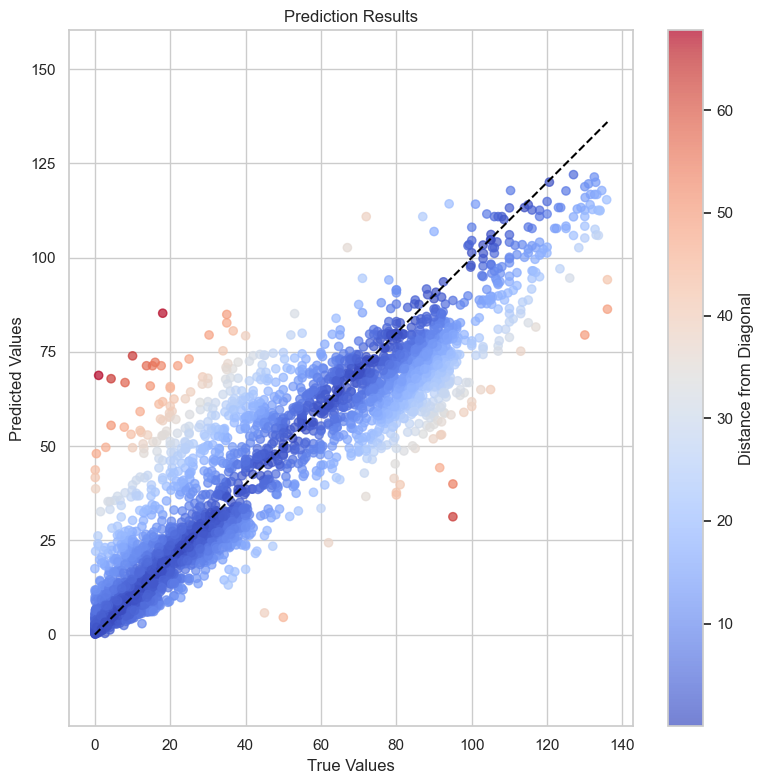

In [26]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

### skopt 50 iter, 10 cv

In [43]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=10, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1725711	total: 20.5ms	remaining: 20.5s
1:	learn: 0.1612979	total: 42.8ms	remaining: 21.3s
2:	learn: 0.1510706	total: 65.9ms	remaining: 21.9s
3:	learn: 0.1416693	total: 86.8ms	remaining: 21.6s
4:	learn: 0.1334980	total: 104ms	remaining: 20.6s
5:	learn: 0.1260592	total: 120ms	remaining: 19.8s
6:	learn: 0.1189519	total: 139ms	remaining: 19.7s
7:	learn: 0.1129280	total: 162ms	remaining: 20.1s
8:	learn: 0.1076103	total: 182ms	remaining: 20.1s
9:	learn: 0.1029122	total: 200ms	remaining: 19.8s
10:	learn: 0.0988327	total: 219ms	remaining: 19.7s
11:	learn: 0.0948185	total: 241ms	remaining: 19.9s
12:	learn: 0.0914026	total: 259ms	remaining: 19.6s
13:	learn: 0.0878779	total: 280ms	remaining: 19.7s
14:	learn: 0.0848691	total: 302ms	remaining: 19.8s
15:	learn: 0.0822509	total: 321ms	remaining: 19.8s
16:	learn: 0.0796305	total: 345ms	remaining: 20s
17:	learn: 0.0773742	total: 368ms	remaining: 20.1s
18:	learn: 0.0751929	total: 390ms	remaining: 20.1s
19:	learn: 0.0732715	total: 412ms	remai

165:	learn: 0.0383923	total: 2.6s	remaining: 13.1s
166:	learn: 0.0383297	total: 2.61s	remaining: 13s
167:	learn: 0.0382706	total: 2.62s	remaining: 13s
168:	learn: 0.0382335	total: 2.63s	remaining: 12.9s
169:	learn: 0.0381941	total: 2.64s	remaining: 12.9s
170:	learn: 0.0381402	total: 2.65s	remaining: 12.9s
171:	learn: 0.0381146	total: 2.66s	remaining: 12.8s
172:	learn: 0.0379989	total: 2.67s	remaining: 12.8s
173:	learn: 0.0379187	total: 2.69s	remaining: 12.8s
174:	learn: 0.0378755	total: 2.69s	remaining: 12.7s
175:	learn: 0.0377847	total: 2.71s	remaining: 12.7s
176:	learn: 0.0376912	total: 2.72s	remaining: 12.7s
177:	learn: 0.0376484	total: 2.73s	remaining: 12.6s
178:	learn: 0.0376179	total: 2.74s	remaining: 12.6s
179:	learn: 0.0375972	total: 2.75s	remaining: 12.5s
180:	learn: 0.0375572	total: 2.76s	remaining: 12.5s
181:	learn: 0.0374955	total: 2.77s	remaining: 12.5s
182:	learn: 0.0374166	total: 2.79s	remaining: 12.4s
183:	learn: 0.0373596	total: 2.8s	remaining: 12.4s
184:	learn: 0.0372

337:	learn: 0.0319682	total: 4.48s	remaining: 8.77s
338:	learn: 0.0319421	total: 4.49s	remaining: 8.75s
339:	learn: 0.0319221	total: 4.5s	remaining: 8.73s
340:	learn: 0.0319167	total: 4.5s	remaining: 8.71s
341:	learn: 0.0318918	total: 4.52s	remaining: 8.69s
342:	learn: 0.0318480	total: 4.53s	remaining: 8.68s
343:	learn: 0.0318307	total: 4.54s	remaining: 8.66s
344:	learn: 0.0318094	total: 4.55s	remaining: 8.64s
345:	learn: 0.0317903	total: 4.56s	remaining: 8.63s
346:	learn: 0.0317770	total: 4.58s	remaining: 8.61s
347:	learn: 0.0317635	total: 4.58s	remaining: 8.59s
348:	learn: 0.0317476	total: 4.59s	remaining: 8.57s
349:	learn: 0.0317395	total: 4.61s	remaining: 8.56s
350:	learn: 0.0317211	total: 4.62s	remaining: 8.54s
351:	learn: 0.0316980	total: 4.64s	remaining: 8.53s
352:	learn: 0.0316760	total: 4.65s	remaining: 8.52s
353:	learn: 0.0316640	total: 4.66s	remaining: 8.49s
354:	learn: 0.0316473	total: 4.67s	remaining: 8.48s
355:	learn: 0.0316421	total: 4.68s	remaining: 8.46s
356:	learn: 0.

505:	learn: 0.0289415	total: 6.64s	remaining: 6.48s
506:	learn: 0.0289354	total: 6.65s	remaining: 6.47s
507:	learn: 0.0289301	total: 6.66s	remaining: 6.45s
508:	learn: 0.0289254	total: 6.67s	remaining: 6.44s
509:	learn: 0.0289235	total: 6.69s	remaining: 6.42s
510:	learn: 0.0289159	total: 6.7s	remaining: 6.41s
511:	learn: 0.0289080	total: 6.72s	remaining: 6.4s
512:	learn: 0.0289059	total: 6.72s	remaining: 6.38s
513:	learn: 0.0288933	total: 6.74s	remaining: 6.37s
514:	learn: 0.0288735	total: 6.75s	remaining: 6.36s
515:	learn: 0.0288616	total: 6.76s	remaining: 6.34s
516:	learn: 0.0288567	total: 6.77s	remaining: 6.33s
517:	learn: 0.0288450	total: 6.79s	remaining: 6.31s
518:	learn: 0.0288394	total: 6.8s	remaining: 6.3s
519:	learn: 0.0288347	total: 6.81s	remaining: 6.29s
520:	learn: 0.0288106	total: 6.82s	remaining: 6.27s
521:	learn: 0.0287961	total: 6.84s	remaining: 6.26s
522:	learn: 0.0287743	total: 6.85s	remaining: 6.25s
523:	learn: 0.0287602	total: 6.87s	remaining: 6.24s
524:	learn: 0.02

671:	learn: 0.0274261	total: 8.79s	remaining: 4.29s
672:	learn: 0.0274146	total: 8.8s	remaining: 4.28s
673:	learn: 0.0274126	total: 8.81s	remaining: 4.26s
674:	learn: 0.0274107	total: 8.83s	remaining: 4.25s
675:	learn: 0.0273939	total: 8.84s	remaining: 4.24s
676:	learn: 0.0273878	total: 8.85s	remaining: 4.22s
677:	learn: 0.0273842	total: 8.87s	remaining: 4.21s
678:	learn: 0.0273767	total: 8.88s	remaining: 4.2s
679:	learn: 0.0273728	total: 8.89s	remaining: 4.18s
680:	learn: 0.0273701	total: 8.9s	remaining: 4.17s
681:	learn: 0.0273642	total: 8.91s	remaining: 4.16s
682:	learn: 0.0273630	total: 8.93s	remaining: 4.14s
683:	learn: 0.0273552	total: 8.95s	remaining: 4.13s
684:	learn: 0.0273516	total: 8.96s	remaining: 4.12s
685:	learn: 0.0273499	total: 8.97s	remaining: 4.11s
686:	learn: 0.0273363	total: 8.98s	remaining: 4.09s
687:	learn: 0.0273290	total: 8.99s	remaining: 4.08s
688:	learn: 0.0273095	total: 9.01s	remaining: 4.07s
689:	learn: 0.0273084	total: 9.02s	remaining: 4.05s
690:	learn: 0.0

842:	learn: 0.0263525	total: 10.9s	remaining: 2.03s
843:	learn: 0.0263484	total: 10.9s	remaining: 2.02s
844:	learn: 0.0263434	total: 10.9s	remaining: 2.01s
845:	learn: 0.0263404	total: 11s	remaining: 1.99s
846:	learn: 0.0263388	total: 11s	remaining: 1.98s
847:	learn: 0.0263352	total: 11s	remaining: 1.97s
848:	learn: 0.0263290	total: 11s	remaining: 1.95s
849:	learn: 0.0263244	total: 11s	remaining: 1.94s
850:	learn: 0.0263217	total: 11s	remaining: 1.93s
851:	learn: 0.0263114	total: 11s	remaining: 1.91s
852:	learn: 0.0263064	total: 11s	remaining: 1.9s
853:	learn: 0.0262943	total: 11.1s	remaining: 1.89s
854:	learn: 0.0262902	total: 11.1s	remaining: 1.88s
855:	learn: 0.0262867	total: 11.1s	remaining: 1.86s
856:	learn: 0.0262786	total: 11.1s	remaining: 1.85s
857:	learn: 0.0262743	total: 11.1s	remaining: 1.84s
858:	learn: 0.0262701	total: 11.1s	remaining: 1.82s
859:	learn: 0.0262631	total: 11.1s	remaining: 1.81s
860:	learn: 0.0262570	total: 11.1s	remaining: 1.8s
861:	learn: 0.0262530	total: 1

In [44]:
best_hyperparameters = {
    'bagging_temperature': 0.3159803525032159,
    'border_count': 86,
    'depth': 9,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 1.3073480417779926,
    'learning_rate': 0.08872157752524094,
    'min_data_in_leaf': 37,
}


model_3_tun = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun.fit(X_train_sc, y_train_sc)


y_pred_3_tun = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1725711	total: 23.1ms	remaining: 23.1s
1:	learn: 0.1612979	total: 43.5ms	remaining: 21.7s
2:	learn: 0.1510706	total: 67.5ms	remaining: 22.4s
3:	learn: 0.1416693	total: 89.2ms	remaining: 22.2s
4:	learn: 0.1334980	total: 108ms	remaining: 21.5s
5:	learn: 0.1260592	total: 125ms	remaining: 20.7s
6:	learn: 0.1189519	total: 145ms	remaining: 20.6s
7:	learn: 0.1129280	total: 168ms	remaining: 20.9s
8:	learn: 0.1076103	total: 189ms	remaining: 20.9s
9:	learn: 0.1029122	total: 207ms	remaining: 20.5s
10:	learn: 0.0988327	total: 226ms	remaining: 20.3s
11:	learn: 0.0948185	total: 250ms	remaining: 20.6s
12:	learn: 0.0914026	total: 268ms	remaining: 20.4s
13:	learn: 0.0878779	total: 290ms	remaining: 20.4s
14:	learn: 0.0848691	total: 314ms	remaining: 20.6s
15:	learn: 0.0822509	total: 332ms	remaining: 20.4s
16:	learn: 0.0796305	total: 357ms	remaining: 20.7s
17:	learn: 0.0773742	total: 379ms	remaining: 20.7s
18:	learn: 0.0751929	total: 403ms	remaining: 20.8s
19:	learn: 0.0732715	total: 426ms	rem

178:	learn: 0.0376179	total: 2.84s	remaining: 13s
179:	learn: 0.0375972	total: 2.85s	remaining: 13s
180:	learn: 0.0375572	total: 2.86s	remaining: 12.9s
181:	learn: 0.0374955	total: 2.87s	remaining: 12.9s
182:	learn: 0.0374166	total: 2.89s	remaining: 12.9s
183:	learn: 0.0373596	total: 2.9s	remaining: 12.9s
184:	learn: 0.0372750	total: 2.92s	remaining: 12.8s
185:	learn: 0.0372346	total: 2.92s	remaining: 12.8s
186:	learn: 0.0372032	total: 2.94s	remaining: 12.8s
187:	learn: 0.0371219	total: 2.95s	remaining: 12.7s
188:	learn: 0.0370740	total: 2.96s	remaining: 12.7s
189:	learn: 0.0369967	total: 2.97s	remaining: 12.7s
190:	learn: 0.0369056	total: 2.98s	remaining: 12.6s
191:	learn: 0.0368491	total: 3s	remaining: 12.6s
192:	learn: 0.0368154	total: 3.01s	remaining: 12.6s
193:	learn: 0.0367458	total: 3.02s	remaining: 12.5s
194:	learn: 0.0367231	total: 3.03s	remaining: 12.5s
195:	learn: 0.0366953	total: 3.04s	remaining: 12.5s
196:	learn: 0.0366512	total: 3.05s	remaining: 12.4s
197:	learn: 0.036587

352:	learn: 0.0316760	total: 4.76s	remaining: 8.73s
353:	learn: 0.0316640	total: 4.77s	remaining: 8.7s
354:	learn: 0.0316473	total: 4.78s	remaining: 8.69s
355:	learn: 0.0316421	total: 4.79s	remaining: 8.67s
356:	learn: 0.0316074	total: 4.8s	remaining: 8.65s
357:	learn: 0.0315965	total: 4.81s	remaining: 8.63s
358:	learn: 0.0315684	total: 4.82s	remaining: 8.61s
359:	learn: 0.0315319	total: 4.84s	remaining: 8.6s
360:	learn: 0.0315140	total: 4.85s	remaining: 8.58s
361:	learn: 0.0315048	total: 4.85s	remaining: 8.56s
362:	learn: 0.0314720	total: 4.87s	remaining: 8.54s
363:	learn: 0.0314540	total: 4.87s	remaining: 8.52s
364:	learn: 0.0314398	total: 4.88s	remaining: 8.5s
365:	learn: 0.0314106	total: 4.89s	remaining: 8.48s
366:	learn: 0.0313978	total: 4.9s	remaining: 8.46s
367:	learn: 0.0313806	total: 4.91s	remaining: 8.44s
368:	learn: 0.0313459	total: 4.92s	remaining: 8.42s
369:	learn: 0.0313393	total: 4.93s	remaining: 8.39s
370:	learn: 0.0313052	total: 4.94s	remaining: 8.38s
371:	learn: 0.031

526:	learn: 0.0287394	total: 6.66s	remaining: 5.98s
527:	learn: 0.0287183	total: 6.67s	remaining: 5.96s
528:	learn: 0.0287013	total: 6.68s	remaining: 5.95s
529:	learn: 0.0286952	total: 6.69s	remaining: 5.93s
530:	learn: 0.0286922	total: 6.7s	remaining: 5.92s
531:	learn: 0.0286751	total: 6.71s	remaining: 5.91s
532:	learn: 0.0286725	total: 6.72s	remaining: 5.89s
533:	learn: 0.0286639	total: 6.74s	remaining: 5.88s
534:	learn: 0.0286607	total: 6.74s	remaining: 5.86s
535:	learn: 0.0286383	total: 6.75s	remaining: 5.85s
536:	learn: 0.0286004	total: 6.77s	remaining: 5.84s
537:	learn: 0.0285979	total: 6.78s	remaining: 5.82s
538:	learn: 0.0285844	total: 6.79s	remaining: 5.8s
539:	learn: 0.0285721	total: 6.8s	remaining: 5.79s
540:	learn: 0.0285490	total: 6.81s	remaining: 5.78s
541:	learn: 0.0285333	total: 6.82s	remaining: 5.76s
542:	learn: 0.0285101	total: 6.83s	remaining: 5.75s
543:	learn: 0.0285029	total: 6.84s	remaining: 5.74s
544:	learn: 0.0284989	total: 6.85s	remaining: 5.72s
545:	learn: 0.0

689:	learn: 0.0273084	total: 8.34s	remaining: 3.75s
690:	learn: 0.0272942	total: 8.35s	remaining: 3.73s
691:	learn: 0.0272869	total: 8.36s	remaining: 3.72s
692:	learn: 0.0272812	total: 8.37s	remaining: 3.71s
693:	learn: 0.0272757	total: 8.38s	remaining: 3.7s
694:	learn: 0.0272717	total: 8.39s	remaining: 3.68s
695:	learn: 0.0272647	total: 8.4s	remaining: 3.67s
696:	learn: 0.0272534	total: 8.41s	remaining: 3.66s
697:	learn: 0.0272477	total: 8.43s	remaining: 3.65s
698:	learn: 0.0272419	total: 8.44s	remaining: 3.63s
699:	learn: 0.0272262	total: 8.45s	remaining: 3.62s
700:	learn: 0.0272242	total: 8.46s	remaining: 3.61s
701:	learn: 0.0272165	total: 8.46s	remaining: 3.59s
702:	learn: 0.0272138	total: 8.47s	remaining: 3.58s
703:	learn: 0.0272014	total: 8.49s	remaining: 3.57s
704:	learn: 0.0271946	total: 8.49s	remaining: 3.55s
705:	learn: 0.0271830	total: 8.51s	remaining: 3.54s
706:	learn: 0.0271797	total: 8.52s	remaining: 3.53s
707:	learn: 0.0271790	total: 8.53s	remaining: 3.52s
708:	learn: 0.

850:	learn: 0.0263217	total: 10s	remaining: 1.75s
851:	learn: 0.0263114	total: 10s	remaining: 1.75s
852:	learn: 0.0263064	total: 10.1s	remaining: 1.73s
853:	learn: 0.0262943	total: 10.1s	remaining: 1.72s
854:	learn: 0.0262902	total: 10.1s	remaining: 1.71s
855:	learn: 0.0262867	total: 10.1s	remaining: 1.7s
856:	learn: 0.0262786	total: 10.1s	remaining: 1.69s
857:	learn: 0.0262743	total: 10.1s	remaining: 1.67s
858:	learn: 0.0262701	total: 10.1s	remaining: 1.66s
859:	learn: 0.0262631	total: 10.1s	remaining: 1.65s
860:	learn: 0.0262570	total: 10.1s	remaining: 1.64s
861:	learn: 0.0262530	total: 10.2s	remaining: 1.63s
862:	learn: 0.0262494	total: 10.2s	remaining: 1.61s
863:	learn: 0.0262456	total: 10.2s	remaining: 1.6s
864:	learn: 0.0262450	total: 10.2s	remaining: 1.59s
865:	learn: 0.0262394	total: 10.2s	remaining: 1.58s
866:	learn: 0.0262321	total: 10.2s	remaining: 1.56s
867:	learn: 0.0262195	total: 10.2s	remaining: 1.55s
868:	learn: 0.0262143	total: 10.2s	remaining: 1.54s
869:	learn: 0.0262

In [55]:
from hyperopt import hp, fmin, tpe, Trials,  space_eval
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials,
            rstate=random_state)
           
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|█████████████████████████████████████████████| 50/50 [27:35<00:00, 33.11s/trial, best loss: 0.0027494667190174652]
Mean Squared Error (MSE): 0.005315371026049817
Mean Absolute Error (MAE): 0.04799985655485963
R-squared (R2): 0.8457687472799701
mape: 7.437720869772018


In [57]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials,
            rstate=random_state)
           
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)
print("Best hyperparameters:", best_params)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|████████████████████████████████████████████| 100/100 [52:55<00:00, 31.76s/trial, best loss: 0.002736803749995755]
Best hyperparameters: {'boosting_type': 'Plain', 'depth': 8, 'iterations': 800, 'learning_rate': 0.0973354621957572, 'max_bin': 128, 'min_child_samples': 10, 'model_size_reg': 0.4812849555078884, 'reg_lambda': 0.003331334746663007}
Mean Squared Error (MSE): 0.005050981927395818
Mean Absolute Error (MAE): 0.046929362595122495
R-squared (R2): 0.8534402836019095
mape: 5.828078655241858


In [29]:
best_params = {
    'boosting_type': 'Plain',
    'depth': 8,
    'iterations': 800,
    'learning_rate': 0.0973354621957572,
    'max_bin': 128,
    'min_child_samples': 10,
    'model_size_reg': 0.4812849555078884,
    'reg_lambda': 0.003331334746663007
}

catboost_model = CatBoostRegressor(**best_params, random_seed=42, verbose=500)

# Train the model
catboost_model.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_3_tun_3= catboost_model.predict(X_test_sc)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"MAPE: {mape_value:.4f}")

0:	learn: 0.1719008	total: 13.3ms	remaining: 10.6s
500:	learn: 0.0338250	total: 5.08s	remaining: 3.03s
799:	learn: 0.0298405	total: 8.1s	remaining: 0us
Mean Squared Error (MSE): 0.0051
Mean Absolute Error (MAE): 0.0469
R-squared (R2): 0.8534
MAPE: 4.9219


In [30]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform( y_pred_3_tun_3.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    32.848456
1            13.4    18.775999
2            69.5    61.024691
3            92.8    68.382822
4            68.0    67.650031
...           ...          ...
4234        101.1    73.009457
4235         87.5    66.565710
4236          5.1     3.044517
4237         36.0    22.832177
4238         24.6    12.892276

[4239 rows x 2 columns]


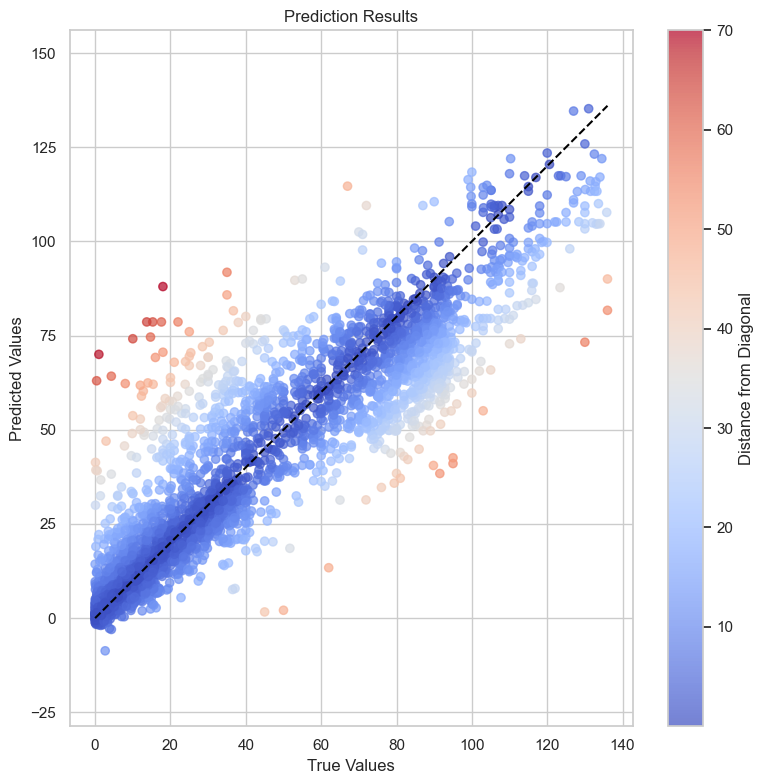

In [31]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [32]:
data = {
    'Model': ['RandomForest', 'RandomForest', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost'],
    'Tuning': ['Before Tuning', 'After SKOPT Tuning', 'Before Tuning', 'After Skopt Tuning (200 iterations, 10 CV)', 'After Skopt Tuning (50 iterations, 5 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)', 'Before Tuning', 'After Skopt Tuning (50 iterations, 5 CV)', 'After Skopt Tuning (200 iterations, 10 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)'],
    'MSE': [0.0055, 0.0072, 0.0055, 0.0052, 0.0056, 0.0056, 0.0054, 0.0051, 0.0049, 0.0045, 0.0051, 0.0053],
    'MAE': [0.0499, 0.0584, 0.0507, 0.0511, 0.0488, 0.0501, 0.0484, 0.0488, 0.0450, 0.0448, 0.0469, 0.0480],
    'R2': [0.8399, 0.7920, 0.8397, 0.8373, 0.8373, 0.8385, 0.8425, 0.8528, 0.8570, 0.8686, 0.8534, 0.8458],
    'MAPE': [7.5905, 12.8389, 7.5745, 10.4263, 7.1791, 6.2896, 8.0978, 7.1105, 8.9931, 7.0545, 5.8281, 7.4377]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Model,Tuning,MSE,MAE,R2,MAPE
0,RandomForest,Before Tuning,0.0055,0.0499,0.8399,7.5905
1,RandomForest,After SKOPT Tuning,0.0072,0.0584,0.7920,12.8389
2,XGBoost,Before Tuning,0.0055,0.0507,0.8397,7.5745
3,XGBoost,"After Skopt Tuning (200 iterations, 10 CV)",0.0052,0.0511,0.8373,10.4263
4,XGBoost,"After Skopt Tuning (50 iterations, 5 CV)",0.0056,0.0488,0.8373,7.1791
5,XGBoost,After Hyperopt Tuning (100 iterations),0.0056,0.0501,0.8385,6.2896
6,XGBoost,After Hyperopt Tuning (50 iterations),0.0054,0.0484,0.8425,8.0978
7,CatBoost,Before Tuning,0.0051,0.0488,0.8528,7.1105
8,CatBoost,"After Skopt Tuning (50 iterations, 5 CV)",0.0049,0.0450,0.8570,8.9931
9,CatBoost,"After Skopt Tuning (200 iterations, 10 CV)",0.0045,0.0448,0.8686,7.0545


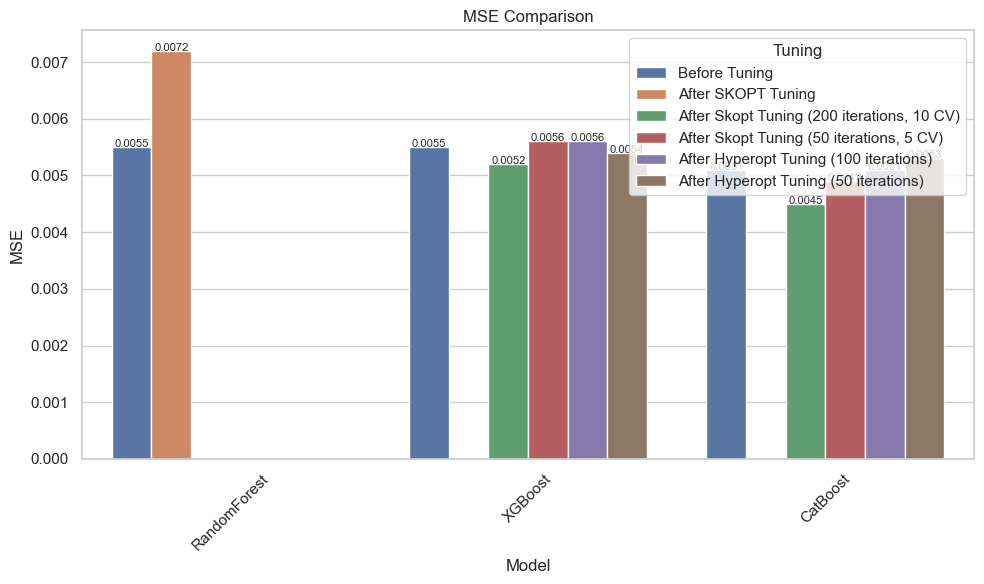

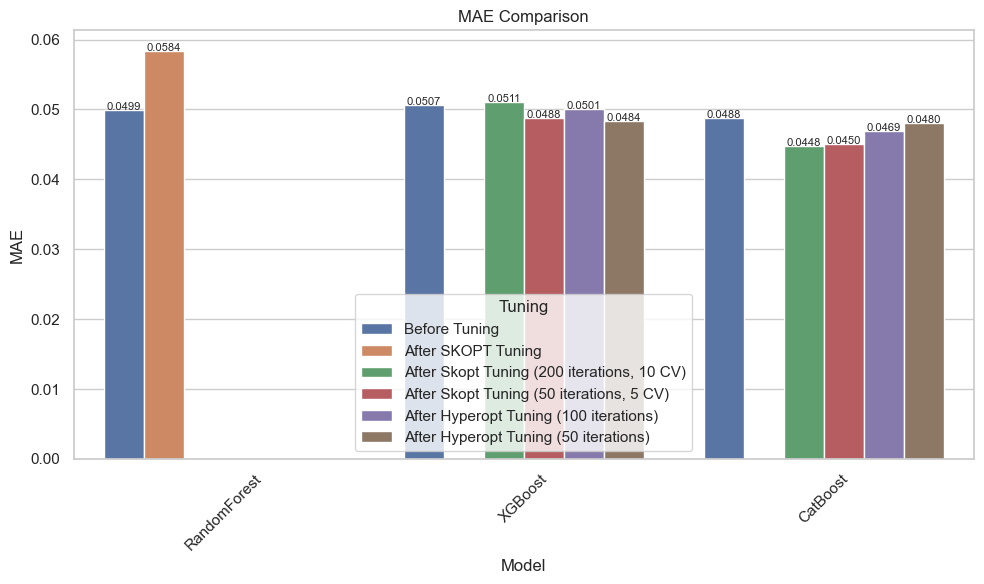

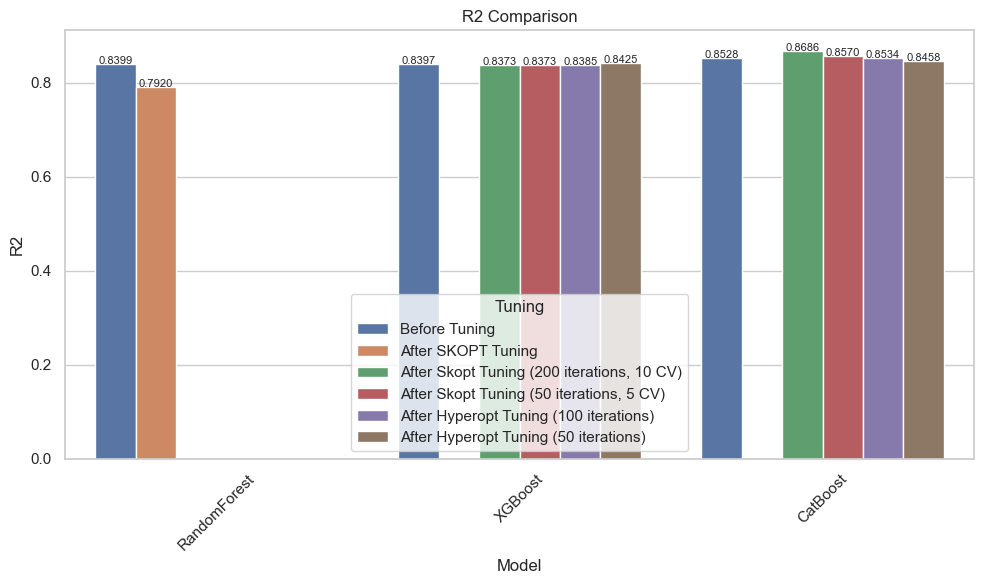

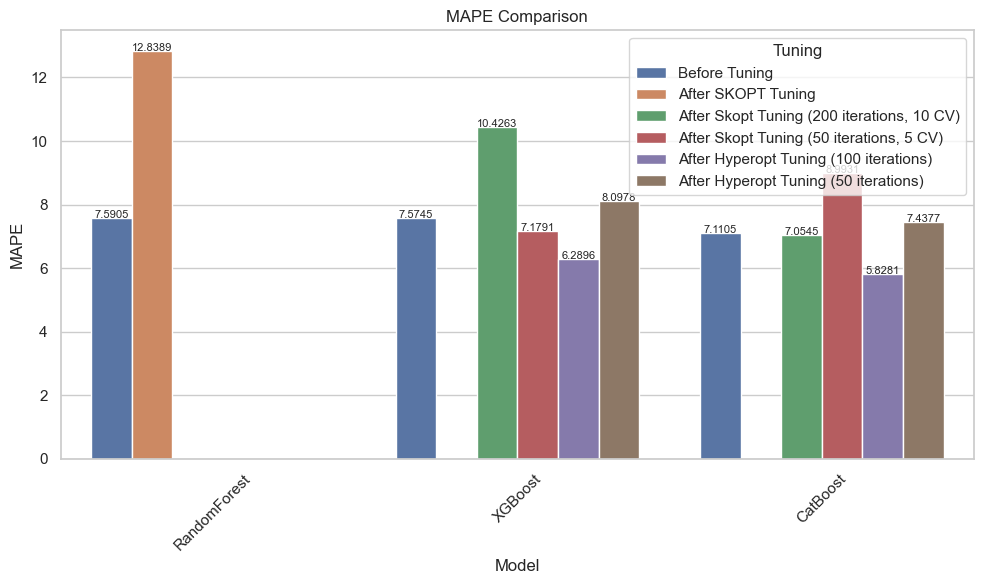

In [33]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', hue='Tuning', data=df)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8) 

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAE', hue='Tuning', data=df)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2', hue='Tuning', data=df)
plt.title('R2 Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAPE', hue='Tuning', data=df)
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()